# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

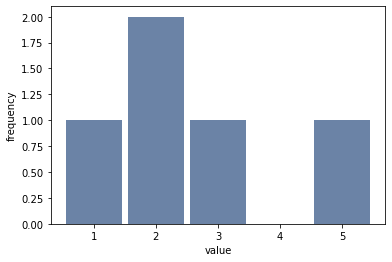

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head() # I added

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

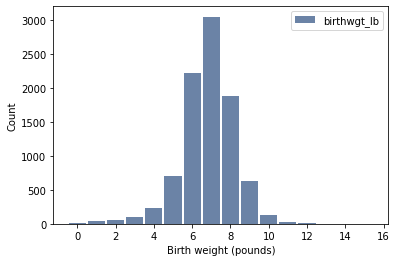

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
live.agepreg.head() # I added

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

In [16]:
ages = np.floor(live.agepreg)

In [17]:
np.sort(ages.unique())

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44.])

In [18]:
# Try using matplotlib first
import matplotlib.pyplot as plt

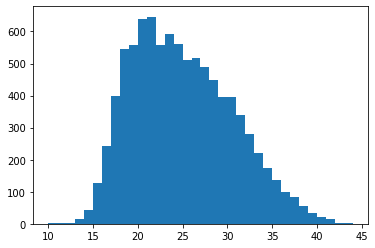

In [19]:
plt.hist(ages, bins=np.sort(ages.unique()))
plt.show()
#ages.hist(bins=35)

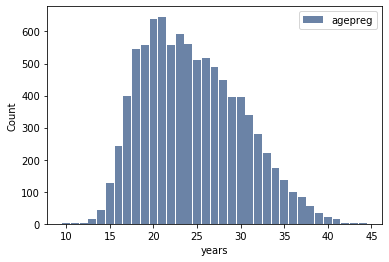

In [20]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

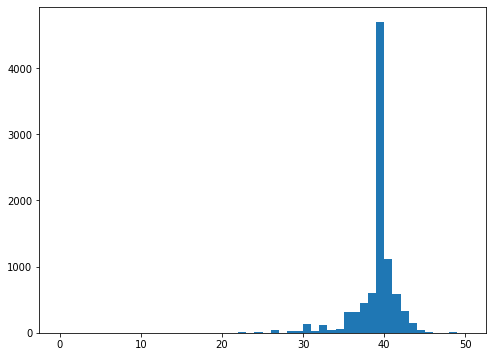

In [21]:
# Solution goes here
plt.figure(figsize=(8,6))
plt.hist(live.prglngth, bins=50)
plt.show()

`Hist` provides smallest, which select the lowest values and their frequencies.

In [22]:
# I try finding largest and smallest values first
live.prglngth.nsmallest(10)

6458      0
4108      4
138       9
11887    13
8919     17
10492    17
541      18
7762     19
1041     20
7800     21
Name: prglngth, dtype: int64

In [23]:
live.prglngth.nlargest(10)

4783     50
8998     50
2416     48
4920     48
6889     48
6890     48
7158     48
7161     48
7592     48
11357    47
Name: prglngth, dtype: int64

In [24]:
live[live.prglngth >= 43].prglngth.value_counts().sort_index()

43    148
44     46
45     10
46      1
47      1
48      7
50      2
Name: prglngth, dtype: int64

In [25]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [26]:
# I try first
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [27]:
others.prglngth.value_counts().sort_index()

4        1
9        1
13       1
17       1
18       1
19       1
21       1
22       4
24       6
25       2
26      19
27       2
28       8
29      12
30      65
31      12
32      60
33      21
34      31
35     152
36     149
37     247
38     335
39    2579
40     580
41     227
42     123
43      61
44      23
45       4
48       4
50       2
Name: prglngth, dtype: int64

In [28]:
len(np.arange(26.5,51.5,1))

25

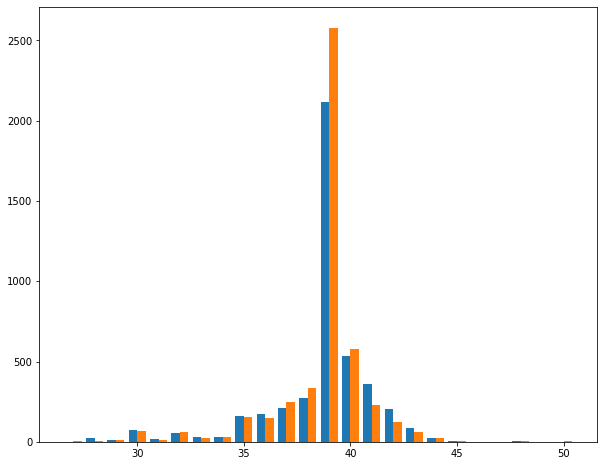

In [29]:
plt.figure(figsize=(10,8))

# If I want to use bar to plot a histogram I first need to create the histogram using value_counts as below
# But, the code below doesn't work because the two bars do not have the same x values.
# firsts.prglngth.value_counts().sort_index().plot.bar(width=0.4, align='edge', label='firsts')
# others.prglngth.value_counts().sort_index().plot.bar(width=-0.4, align='edge', color='red', label='others')

# Can use a list as first parameter in the call to hist.
# For hist only the data series itself is needed. Hist makes the histogram.
# The range of the bins below centers on the discrete values, making this work
plt.hist([firsts.prglngth, others.prglngth] , bins=np.arange(26.5,51.5,1), label=['firsts', 'others'])

# Can manually set ticks to step of one instead of 5 if wanted with code below
# plt.xticks(np.arange(26, 51, step=1))

# Can also use major and minor ticks as explained here:
# https://www.oreilly.com/library/view/matplotlib-plotting-cookbook/9781849513265/ch03s11.html

# plt.legend()
plt.show()

In [30]:
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

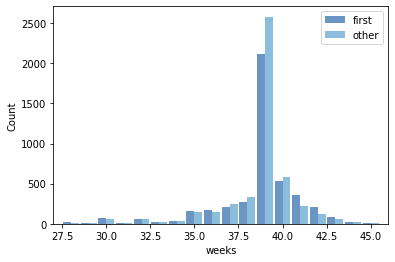

In [31]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [32]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [33]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [34]:
np.sqrt(var)

2.702343810070593

Here's are the mean pregnancy lengths for first babies and others:

In [35]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [36]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [37]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [38]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [39]:
# Just messing around to see how the above function works with dataframes
import pandas as pd

df1 = pd.DataFrame(np.random.randint(1,50,32).reshape(4,8))
df2 = pd.DataFrame(np.random.randint(1,50,32).reshape(4,8))

In [40]:
df1

,0,1,2,3,4,5,6,7
0,46,27,13,28,16,45,37,35
1,41,11,49,32,3,20,25,14
2,49,41,15,45,10,7,41,24
3,36,19,30,46,2,23,8,5


In [41]:
diff = df1.mean() - df2.mean()
diff

0    14.50
1     0.00
2    -6.50
3    21.75
4    -9.50
5    -2.25
6    -3.75
7     2.50
dtype: float64

In [42]:
len(df1)

4

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [43]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [44]:
# The above would mean that 'other' babies are heavier than 'firsts' but the low Cohen effect means this is negligible.
# It is however higher than the effect shown in pregnancy length, making this one seem to be even more negligible.

For the next few exercises, we'll load the respondent file:

In [45]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [46]:
resp.totincr.head()

0     9
1    10
2     5
3    13
4     6
Name: totincr, dtype: int64

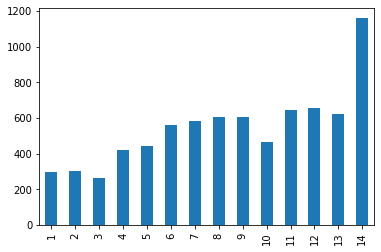

In [47]:
# I would use a bar plot for this since there is only one set to plot and the values are discrete
# This did not work earlier with prglngth for two sets because the x values were not the same
resp.totincr.value_counts().sort_index().plot.bar()

In [48]:
# Mess around with reindex to try to create a new dataframe with no values for indexes that have values that don't exist
df1 = pd.DataFrame(np.random.randint(1,50,32).reshape(4,8))
df1

,0,1,2,3,4,5,6,7
0,17,25,13,8,20,2,18,8
1,11,36,14,29,8,47,16,15
2,15,3,29,42,13,42,44,8
3,30,14,30,43,15,13,25,6


In [61]:
# Reindexing works to set a dataframe with NaN for indexes that have no values, which solves the bar plotting problem I had
df1.reindex(np.arange(0,6))

,0,1,2,3,4,5,6,7
0,17.0,25.0,13.0,8.0,20.0,2.0,18.0,8.0
1,11.0,36.0,14.0,29.0,8.0,47.0,16.0,15.0
2,15.0,3.0,29.0,42.0,13.0,42.0,44.0,8.0
3,30.0,14.0,30.0,43.0,15.0,13.0,25.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# If I reindex both prglngth dataframes to the same index then I can use plot.bar to create discrete value histograms
firsts_reidx = firsts.prglngth.value_counts().reindex(np.arange(0,51))
others_reidx = others.prglngth.value_counts().reindex(np.arange(0,51))

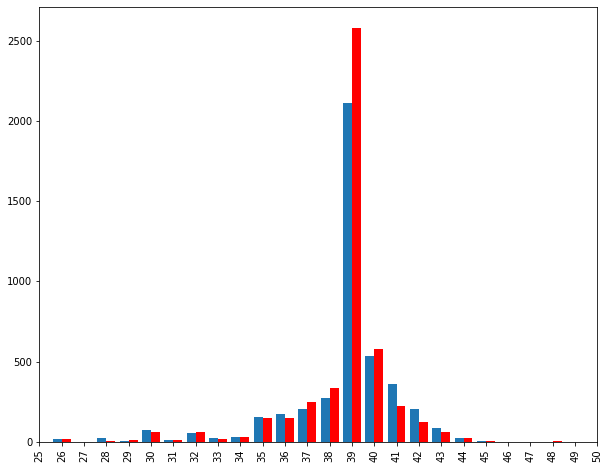

In [63]:
plt.figure(figsize=(10,8))

firsts_reidx.plot.bar(width=-0.4, align='edge', label='firsts')
others_reidx.plot.bar(width=0.4, align='edge', color='red', label='others')

plt.xlim(25,50)

plt.show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

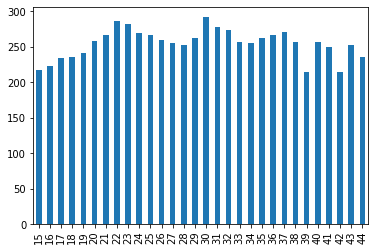

In [68]:
# Solution goes here
resp.age_r.value_counts().sort_index().plot.bar()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

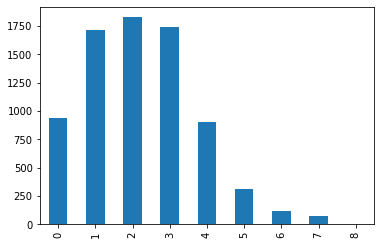

In [69]:
# Solution goes here
resp.numfmhh.value_counts().sort_index().plot.bar()

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

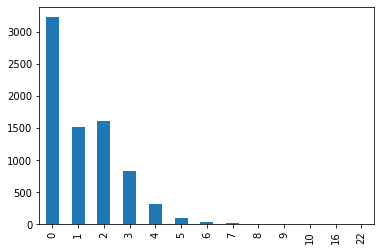

In [70]:
# Solution goes here
resp.parity.value_counts().sort_index().plot.bar()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [72]:
# Solution goes here
resp.parity.nlargest(3)

715     22
5339    16
682     10
Name: parity, dtype: int64

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

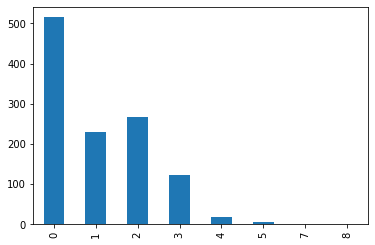

In [82]:
# Solution goes here
resp[resp.totincr == 14].parity.value_counts().sort_index().plot.bar()

In [83]:
# Percentage of high income people who have had more than one child
len(resp[(resp.totincr == 14) & (resp.parity >= 1)])/len(resp[resp.totincr == 14])

0.5560344827586207

In [84]:
# Percentage of all respondents who have had more than one child
len(resp[resp.parity >= 1])/len(resp)

0.5773910768023027

Find the largest parities for high income respondents.

In [89]:
# Solution goes here
resp[resp.totincr == 14].parity.nlargest(3)

2445    8
6615    7
878     5
Name: parity, dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [90]:
# Solution goes here
# Comparison of means
resp[resp.totincr == 14].parity.mean(), resp[resp.totincr < 14].parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [91]:
# Solution goes here
# This one has a significantly higher Cohen effect size than the others looked at earlier
CohenEffectSize(resp[resp.totincr == 14].parity, resp[resp.totincr < 14].parity)

-0.1251185531466061